# Paso 1: Cargue del modelo de datos


In [ ]:
# Parents heights vs children heights (Galton data) (kaggle.com)
#https://www.kaggle.com/datasets/jacopoferretti/parents-heights-vs-children-heights-galton-data?resource=download
# El objetivo principal de este estudio fue establecer una relación entre la
# altura de los niños y los padres. Galton también quería saber si la selección
# del matrimonio indica una relación entre la altura del marido y la de su esposa

import pandas as pd
import numpy as np

df = pd.read_csv('GaltonFamilies.csv')

#Paso 2: Visualización de una Muestra:

In [ ]:
df.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [ ]:
#Any missing values?

df.isnull().sum()

rownames           0
family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

In [ ]:
#Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [ ]:
df1 = df.copy()

#Eliminando las columnas rownames y children
df1 = df1.drop(columns=['rownames'])
df1 = df1.drop(columns=['children'])


# Eliminar las columnas family
df1 = df1.drop(columns=['family'])

# reemplazar la columna gender por números para el clasificador
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})
df1.head()


,father,mother,midparentHeight,childNum,gender,childHeight
0,78.5,67.0,75.43,1,0,73.2
1,78.5,67.0,75.43,2,1,69.2
2,78.5,67.0,75.43,3,1,69.0
3,78.5,67.0,75.43,4,1,69.0
4,75.5,66.5,73.66,1,0,73.5


In [ ]:
#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia

n_dup = len(df1) - len(df1.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 23
Number of duplicate rows: 23


In [ ]:
# revisando cuantos valores hay por cada clase
counts = df["gender"].value_counts()
print (counts)
#plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

gender
0    463
1    448
Name: count, dtype: int64


In [ ]:
dataset = df1.values
dataset

array([[78.5 , 67.  , 75.43,  1.  ,  0.  , 73.2 ],
       [78.5 , 67.  , 75.43,  2.  ,  1.  , 69.2 ],
       [78.5 , 67.  , 75.43,  3.  ,  1.  , 69.  ],
       ...,
       [62.  , 66.  , 66.64,  3.  ,  1.  , 61.  ],
       [62.5 , 63.  , 65.27,  1.  ,  0.  , 66.5 ],
       [62.5 , 63.  , 65.27,  2.  ,  1.  , 57.  ]])

In [ ]:
X = dataset[:,0:5]
X

array([[78.5 , 67.  , 75.43,  1.  ,  0.  ],
       [78.5 , 67.  , 75.43,  2.  ,  1.  ],
       [78.5 , 67.  , 75.43,  3.  ,  1.  ],
       ...,
       [62.  , 66.  , 66.64,  3.  ,  1.  ],
       [62.5 , 63.  , 65.27,  1.  ,  0.  ],
       [62.5 , 63.  , 65.27,  2.  ,  1.  ]])

In [ ]:
Y = dataset[:,5]
Y

array([73.2, 69.2, 69. , 69. , 73.5, 72.5, 65.5, 65.5, 71. , 68. , 70.5,
       68.5, 67. , 64.5, 63. , 72. , 69. , 68. , 66.5, 62.5, 62.5, 69.5,
       76.5, 74. , 73. , 73. , 70.5, 64. , 70.5, 68. , 66. , 66. , 65.5,
       74. , 70. , 68. , 67. , 67. , 66. , 63.5, 63. , 65. , 71. , 62. ,
       68. , 67. , 71. , 70.5, 66.7, 72. , 70.5, 70.2, 70.2, 69.2, 68.7,
       66.5, 64.5, 63.5, 74. , 73. , 71.5, 62.5, 66.5, 62.3, 66. , 64.5,
       64. , 62.7, 73.2, 73. , 72.7, 70. , 69. , 68.5, 68. , 66. , 73. ,
       68.5, 68. , 73. , 71. , 67. , 74.2, 70.5, 69.5, 66. , 65.5, 65. ,
       65. , 65.5, 66. , 63. , 70.5, 70.5, 69. , 65. , 63. , 69. , 67. ,
       63. , 73. , 67. , 70.5, 70. , 66.5, 63. , 67.5, 67.2, 66.7, 64. ,
       71. , 70. , 70. , 66. , 65. , 65. , 74. , 72. , 69. , 67.5, 63.5,
       72. , 71.5, 71.5, 70. , 68. , 65.7, 78. , 74. , 73. , 72. , 67. ,
       73.2, 73. , 69. , 67. , 70. , 67. , 67. , 66.5, 70. , 69. , 68.5,
       66. , 64.5, 63. , 71. , 67. , 76. , 72. , 71

#Paso 3: Escalamiento de los datos

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.        , 0.72      , 1.        , 0.        , 0.        ],
       [1.        , 0.72      , 1.        , 0.07142857, 1.        ],
       [1.        , 0.72      , 1.        , 0.14285714, 1.        ],
       ...,
       [0.        , 0.64      , 0.2030825 , 0.14285714, 1.        ],
       [0.03030303, 0.4       , 0.07887579, 0.        , 0.        ],
       [0.03030303, 0.4       , 0.07887579, 0.07142857, 1.        ]])

In [ ]:
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1)  )
Y_scale

array([[0.74782609],
       [0.57391304],
       [0.56521739],
       [0.56521739],
       [0.76086957],
       [0.7173913 ],
       [0.41304348],
       [0.41304348],
       [0.65217391],
       [0.52173913],
       [0.63043478],
       [0.54347826],
       [0.47826087],
       [0.36956522],
       [0.30434783],
       [0.69565217],
       [0.56521739],
       [0.52173913],
       [0.45652174],
       [0.2826087 ],
       [0.2826087 ],
       [0.58695652],
       [0.89130435],
       [0.7826087 ],
       [0.73913043],
       [0.73913043],
       [0.63043478],
       [0.34782609],
       [0.63043478],
       [0.52173913],
       [0.43478261],
       [0.43478261],
       [0.41304348],
       [0.7826087 ],
       [0.60869565],
       [0.52173913],
       [0.47826087],
       [0.47826087],
       [0.43478261],
       [0.32608696],
       [0.30434783],
       [0.39130435],
       [0.65217391],
       [0.26086957],
       [0.52173913],
       [0.47826087],
       [0.65217391],
       [0.630

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)


In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Eliminar una fila específica (por ejemplo, la primera fila)
X_test = np.delete(X_test, 0, axis=0)
Y_test = np.delete(Y_test, 0, axis=0)

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_val:", len(Y_val))
print("Longitud de Y_train:", len(Y_train))

Longitud de Y_test: 140
Longitud de Y_val: 140
Longitud de Y_train: 653


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(653, 5) (140, 5) (140, 5) (653, 1) (140, 1) (140, 1)


#Paso 4:Construcción del Modelo

The architecture that we want to implement is this:


- Hidden layer 1: 16 neurons, ReLU activation
- Hidden layer 2: 8 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#Crear una instancia de MLPCLassifier
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(16, 8), # Revisar para modificar
                     activation='relu',
                     solver='adam',
                     max_iter=100,
                     random_state=42,
                     verbose=True)

#Paso 5: Entrenamiento del Modelo

In [ ]:
# Asegurarse de que y_train y y_test tengan la forma correcta
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Entrenar el modelo
model.fit(X_train, Y_train)

Iteration 1, loss = 0.04581808
Iteration 2, loss = 0.03539300
Iteration 3, loss = 0.02831615
Iteration 4, loss = 0.02418532
Iteration 5, loss = 0.02119178
Iteration 6, loss = 0.01873285
Iteration 7, loss = 0.01666475
Iteration 8, loss = 0.01492665
Iteration 9, loss = 0.01345498
Iteration 10, loss = 0.01222066
Iteration 11, loss = 0.01112980
Iteration 12, loss = 0.01015456
Iteration 13, loss = 0.00931046
Iteration 14, loss = 0.00848821
Iteration 15, loss = 0.00776228
Iteration 16, loss = 0.00711637
Iteration 17, loss = 0.00652721
Iteration 18, loss = 0.00599428
Iteration 19, loss = 0.00554713
Iteration 20, loss = 0.00516599
Iteration 21, loss = 0.00486569
Iteration 22, loss = 0.00465870
Iteration 23, loss = 0.00448718
Iteration 24, loss = 0.00438146
Iteration 25, loss = 0.00429201
Iteration 26, loss = 0.00422346
Iteration 27, loss = 0.00416936
Iteration 28, loss = 0.00412598
Iteration 29, loss = 0.00409598
Iteration 30, loss = 0.00406632
Iteration 31, loss = 0.00403698
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=100, random_state=42,
             verbose=True)

# Paso 6: Predicción del Modelo

In [ ]:
#Realizar predicciones del modelo en el conjunto de prueba
Y_pred = model.predict(X_test)
#print (Y_test)
#print(Y_pred)


#Paso 7: Graficar y evaluación del Modelo

Longitud de Y_test: 140
Longitud de Y_pred: 140
Longitud de Y_train: 653
R^2 score =  0.639884197123259
Mean Squared Error =  0.0075500321707019594
Root Mean Squared Error =  0.08689092110630407
Mean Absolute Error =  0.06739153425235987


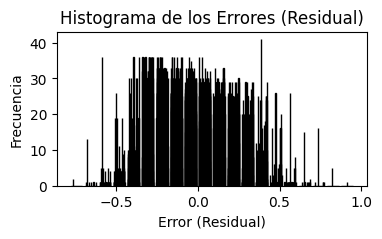

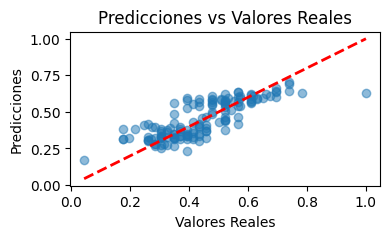

In [ ]:
# Evaluar el modelo

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Importar métricas de regresión

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_pred:", len(Y_pred))
print("Longitud de Y_train:", len(Y_train))

# Asegurarse de que las longitudes sean iguales
assert len(Y_test) == len(Y_pred), "Las longitudes de Y_test y Y_val deben ser iguales"

#Calcula la precisión del modelo
#accuracy = accuracy_score(Y_test, Y_pred)
#print("Precisión del modelo (Accuracy):", accuracy)

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, Y_pred)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

#Paso 8: Ajustar el modelo

In [ ]:
#  sequentially (layer by layer)
#  ‘Dense’ refers to a fully-connected layer
model = Sequential([
    Dense(16, activation='relu', input_shape=(5,)),
    #Dense(32, activation='relu'),                   #Ajustar a 16 y sólo dejar una de 32
    Dense(1, activation='sigmoid'),
])

# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
               loss = 'mean_squared_error', #mse
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, Y_val))

Epoch 1/120
21/21 [==============================] - 1s 13ms/step - loss: 0.0287 - accuracy: 0.0015 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 2/120
21/21 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.0015 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 3/120
21/21 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.0015 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 4/120
21/21 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.0015 - val_loss: 0.0237 - val_accuracy: 0.0000e+00
Epoch 5/120
21/21 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 0.0015 - val_loss: 0.0235 - val_accuracy: 0.0000e+00
Epoch 6/120
21/21 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.0015 - val_loss: 0.0232 - val_accuracy: 0.0000e+00
Epoch 7/120
21/21 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.0015 - val_loss: 0.0230 - val_accur

In [ ]:
# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
#model.evaluate(X_test, Y_test)[1]

### Visualizing loss and accuracy

A good model is one where the testing and training set errors are very similar, and at their lowest point.

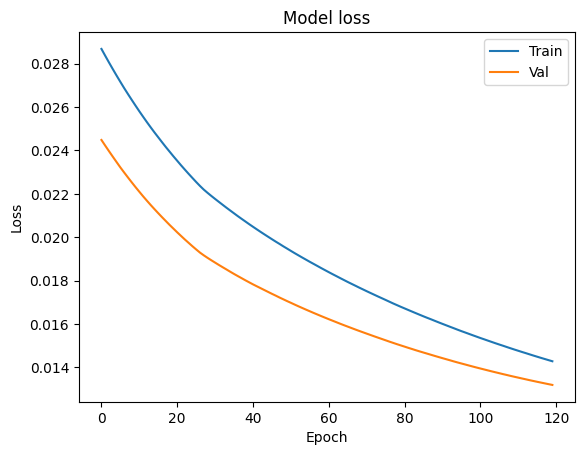

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

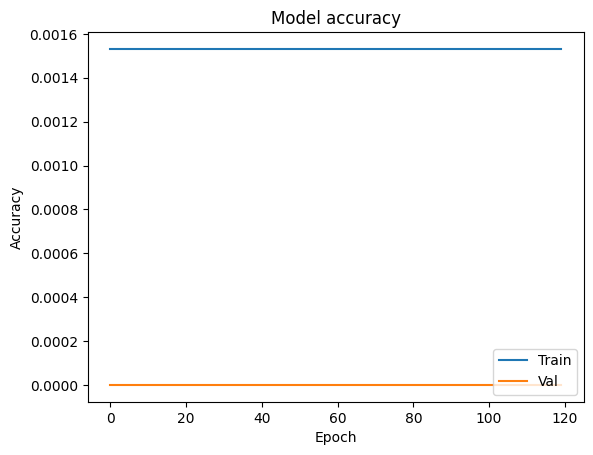

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding regularization to our network

Our model is overfitting. Similarly to simpler machine learning models, we can add **regularization** to our neural network to help correct this. However, the exact types of regularization are somewhat different than the ones used for our usual classification models, and go by different names:

- L2 Regularization
- Early Stopping
- Dropout




In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(5,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model_2.compile(optimizer='adam',
              loss = 'mean_squared_error', #mse
              #loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
21/21 [==============================] - 2s 56ms/step - loss: 0.0124 - accuracy: 0.0015 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 1s 48ms/step - loss: 0.0088 - accuracy: 0.0015 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0083 - accuracy: 0.0015 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 1s 48ms/step - loss: 0.0079 - accuracy: 0.0015 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 1s 46ms/step - loss: 0.0078 - accuracy: 0.0015 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0076 - accuracy: 0.0015 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 1s 46ms/step - loss: 0.0077 - accuracy: 0.0015 - val_loss: 0.0072 - val

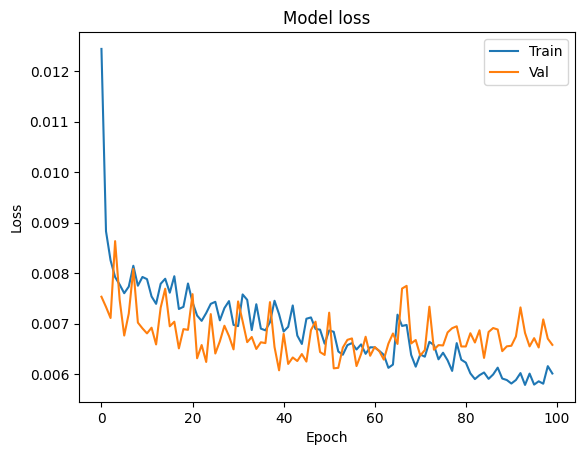

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

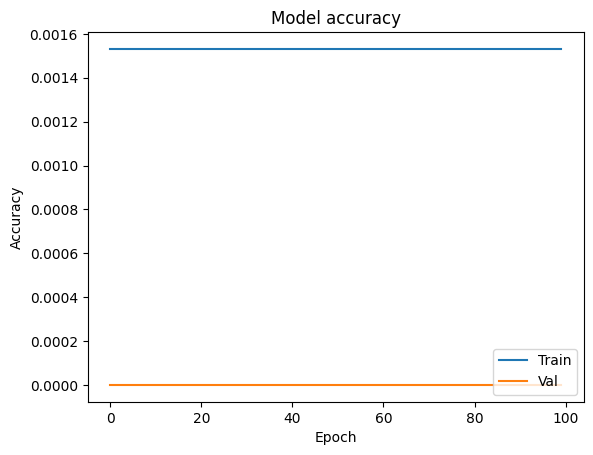

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
             # loss='binary_crossentropy',
               loss = 'mean_squared_error', #mse
              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
21/21 [==============================] - 4s 96ms/step - loss: 17.8787 - accuracy: 0.0015 - val_loss: 7.7412 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 1s 57ms/step - loss: 3.9439 - accuracy: 0.0015 - val_loss: 1.2638 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 1s 53ms/step - loss: 0.5589 - accuracy: 0.0015 - val_loss: 0.1346 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 1s 51ms/step - loss: 0.0670 - accuracy: 0.0015 - val_loss: 0.0282 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 1s 50ms/step - loss: 0.0287 - accuracy: 0.0015 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 1s 50ms/step - loss: 0.0262 - accuracy: 0.0015 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 1s 51ms/step - loss: 0.0257 - accuracy: 0.0015 - val_loss: 0.0215 - va

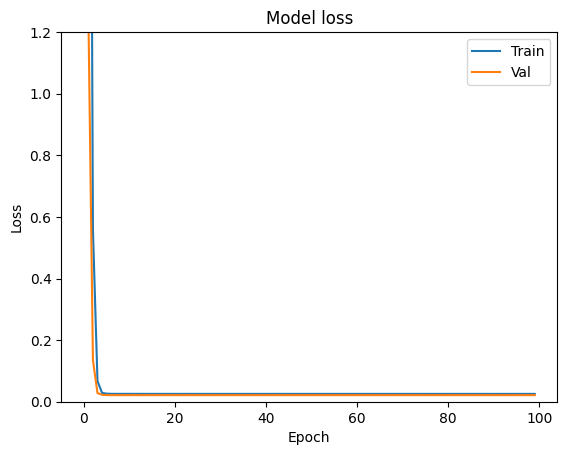

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

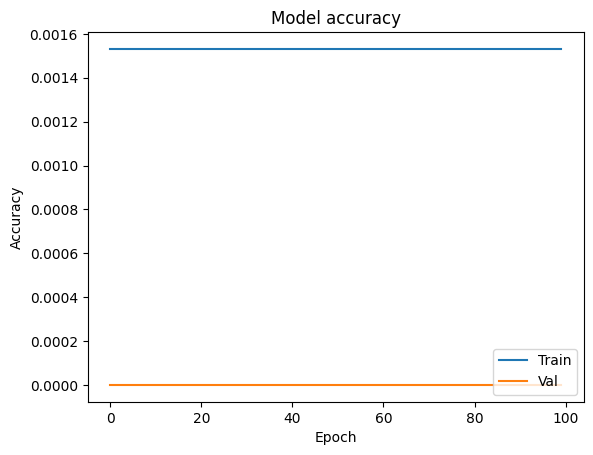

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#Instalar scikeras si no está instalado
!pip install --upgrade scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


Number of duplicate rows: 23
gender
0    463
1    448
Name: count, dtype: int64
Longitud de Y_test: 136
Longitud de Y_val: 137
Longitud de Y_train: 637
Longitud de X_train: 637
Longitud de y_train: 637
Longitud de X_test: 136
Longitud de y_test: 136
Dimensiones de X_train: (137, 5)
Dimensiones de y_train: (137, 1)
Dimensiones de X_test: (136, 5)
Dimensiones de y_test: (136, 1)

Iteration 1, loss = 0.29439118
Iteration 2, loss = 0.23062553
Iteration 3, loss = 0.17863330
Iteration 4, loss = 0.13614870
Iteration 5, loss = 0.10332992
Iteration 6, loss = 0.07857302
Iteration 7, loss = 0.06077906
Iteration 8, loss = 0.04794855
Iteration 9, loss = 0.03871933
Iteration 10, loss = 0.03169168
Iteration 11, loss = 0.02620282
Iteration 12, loss = 0.02168753
Iteration 13, loss = 0.01796993
Iteration 14, loss = 0.01478902
Iteration 15, loss = 0.01193756
Iteration 16, loss = 0.00948370
Iteration 17, loss = 0.00757084
Iteration 18, loss = 0.00619616
Iteration 19, loss = 0.00539213
Iteration 20, loss =

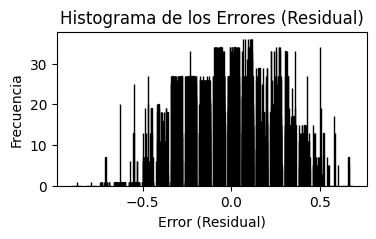

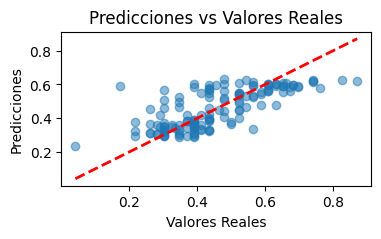

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Importar métricas de regresión

# Cargar y procesar los datos (ejemplo)
df = pd.read_csv('GaltonFamilies.csv')

#Any missing values?
df.isnull().sum()

#Checking data types
#df.info()

# Preprocesamiento de datos (ejemplo)
df1 = df.copy()
df1 = df1.drop(columns=['rownames', 'children', 'family'])
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})
#df1.head()

#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia
#n_dup = len(df1) - len(df1.drop_duplicates())
#print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df2 = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

# revisando cuantos valores hay por cada clase
counts = df2["gender"].value_counts()
print (counts)
#plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

# Escalar datos
dataset = df2.values
X = dataset[:,0:5]
Y = dataset[:, 5]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1)  )

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Eliminar una fila específica (por ejemplo, la primera fila)
X_test = np.delete(X_test, 0, axis=0)
Y_test = np.delete(Y_test, 0, axis=0)

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_val:", len(Y_val))
print("Longitud de Y_train:", len(Y_train))
print(f"Longitud de X_train: {len(X_train)}")
print(f"Longitud de y_train: {len(Y_train)}")
print(f"Longitud de X_test: {len(X_test)}")
print(f"Longitud de y_test: {len(Y_test)}")

# Ejemplo de verificación de dimensiones antes de GridSearchCV
print(f"Dimensiones de X_train: {X_val.shape}")
print(f"Dimensiones de y_train: {Y_val.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {Y_test.shape}")
print()

model = MLPRegressor(hidden_layer_sizes=(32, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=100,
                     random_state=42,
                     verbose=True)

# Asegurarse de que y_train y y_test tengan la forma correcta
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Entrenar el modelo
model.fit(X_train, Y_train)

#Realizar predicciones del modelo en el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_pred:", len(Y_pred))
print("Longitud de Y_train:", len(Y_train))

# Asegurarse de que las longitudes sean iguales
assert len(Y_test) == len(Y_pred), "Las longitudes de Y_test y Y_val deben ser iguales"

#Calcula la precisión del modelo
#accuracy = accuracy_score(Y_test, Y_pred)
#print("Precisión del modelo (Accuracy):", accuracy)

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, Y_pred)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

#Paso 9: Ajuste de parámetros

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Cargar y procesar los datos (ejemplo)
df = pd.read_csv('GaltonFamilies.csv')

# Preprocesamiento de datos
df1 = df.copy()
df1 = df1.drop(columns=['rownames', 'children', 'family'])
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})

# Eliminar filas duplicadas si las hubiera
df1 = df1.drop_duplicates()

# Escalar datos
dataset = df1.values
X = dataset[:, 0:5]
Y = dataset[:, 5].astype(float)  # Asegurar que Y sea tipo float

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
Y_scale = scaler.fit_transform(Y.reshape(-1, 1)).flatten()  # Flatten para asegurar una dimensión correcta

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2, random_state=42)

# Definir una función para crear el modelo
def create_model(optimizer='adam', hidden_layer_sizes=(32, 32), activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train.shape[1],)))
    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(1))  # Capa de salida para regresión lineal
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    return model

# Función para evaluar el modelo con diferentes configuraciones
def evaluate_model(X_train, Y_train, X_test, Y_test, optimizer, hidden_layer_sizes, activation, epochs):
    model = create_model(optimizer=optimizer, hidden_layer_sizes=hidden_layer_sizes, activation=activation)
    model.fit(X_train, Y_train, epochs=epochs, verbose=0)
    Y_pred = model.predict(X_test).flatten()

    # Calcular métricas de evaluación
    accuracy = model.evaluate(X_test, Y_test)[1]
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)

    return optimizer, hidden_layer_sizes, activation, epochs, accuracy, r2, mse

# Definir configuraciones a probar
optimizers = ['adam', 'rmsprop', 'sgd']
hidden_layer_sizes = [(32,), (64,), (32, 32), (64, 32)]
activations = ['relu', 'sigmoid']
epochs = [20, 30, 40]

# Lista para almacenar resultados
results = []

# Iterar sobre todas las combinaciones de parámetros
for opt in optimizers:
    for hl_sizes in hidden_layer_sizes:
        for act in activations:
            for ep in epochs:
                result = evaluate_model(X_train, Y_train, X_test, Y_test, opt, hl_sizes, act, ep)
                results.append(result)

# Crear un DataFrame para visualizar los resultados
results_df = pd.DataFrame(results, columns=['Optimizer', 'Hidden Layer Sizes', 'Activation', 'Epochs', 'Accuracy', 'R2 Score', 'MSE'])
results_df.sort_values(by='MSE', ascending=True, inplace=True)  # Ordenar por MSE ascendente o la métrica que prefieras

# Mostrar tabla resumen
print("Tabla Resumen de Resultados:")
print(results_df.head(10))  # Mostrar los 10 mejores resultados

# Guardar los resultados en un archivo CSV si deseas
results_df.to_csv('results_summary.csv', index=False)

6/6 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.0000e+00
Tabla Resumen de Resultados:
   Optimizer Hidden Layer Sizes Activation  Epochs  Accuracy  R2 Score  \
14      adam           (32, 32)       relu      40  0.005464  0.647575   
25   rmsprop              (32,)       relu      30  0.005464  0.644575   
7       adam              (64,)       relu      30  0.005464  0.642405   
66       sgd           (64, 32)       relu      20  0.005464  0.637573   
26   rmsprop              (32,)       relu      40  0.005464  0.635753   
13      adam           (32, 32)       relu      30  0.005464  0.634707   
31   rmsprop              (64,)       relu      30  0.005464  0.634439   
36   rmsprop           (32, 32)       relu      20  0.005464  0.633306   
18      adam           (64, 32)       relu      20  0.005464  0.632675   
27   rmsprop              (32,)    sigmoid      20  0.005464  0.631999   

         MSE  
14  0.008201  
25  0.008271  
7   0.008321  
66  0.0

#Paso 10 Probando con la mejor opción

In [ ]:
# Definir configuraciones a probar
optimizers = ['adam']
hidden_layer_sizes = [(8,), (16,),(32, 32)]
activations = ['relu']
epochs = [10, 20, 30, 35, 40, 50, 60, 70]

# Lista para almacenar resultados
results = []

# Iterar sobre todas las combinaciones de parámetros
for opt in optimizers:
    for hl_sizes in hidden_layer_sizes:
        for act in activations:
            for ep in epochs:
                result = evaluate_model(X_train, Y_train, X_test, Y_test, opt, hl_sizes, act, ep)
                results.append(result)

# Crear un DataFrame para visualizar los resultados
results_df = pd.DataFrame(results, columns=['Optimizer', 'Hidden Layer Sizes', 'Activation', 'Epochs', 'Accuracy', 'R2 Score', 'MSE'])
results_df.sort_values(by='MSE', ascending=True, inplace=True)  # Ordenar por MSE ascendente o la métrica que prefieras

# Mostrar tabla resumen
print("Tabla Resumen de Resultados:")
print(results_df.head(10))  # Mostrar los 10 mejores resultados

# Guardar los resultados en un archivo CSV si deseas
results_df.to_csv('results_summary.csv', index=False)

6/6 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.0055
Tabla Resumen de Resultados:
   Optimizer Hidden Layer Sizes Activation  Epochs  Accuracy  R2 Score  \
7       adam               (8,)       relu      70  0.005464  0.639968   
22      adam           (32, 32)       relu      60  0.005464  0.634969   
21      adam           (32, 32)       relu      50  0.005464  0.633224   
10      adam              (16,)       relu      30  0.005464  0.628628   
17      adam           (32, 32)       relu      20  0.005464  0.628133   
15      adam              (16,)       relu      70  0.005464  0.627640   
16      adam           (32, 32)       relu      10  0.005464  0.624125   
19      adam           (32, 32)       relu      35  0.005464  0.623632   
4       adam               (8,)       relu      40  0.005464  0.623605   
14      adam              (16,)       relu      60  0.005464  0.623507   

         MSE  
7   0.008378  
22  0.008495  
21  0.008535  
10  0.00864

In [ ]:
# Definir configuraciones a probar
optimizers = ['adam']
hidden_layer_sizes = [(8,)]
activations = ['relu']
epochs = [70, 75, 80, 90, 100, 120]

# Lista para almacenar resultados
results = []

# Iterar sobre todas las combinaciones de parámetros
for opt in optimizers:
    for hl_sizes in hidden_layer_sizes:
        for act in activations:
            for ep in epochs:
                result = evaluate_model(X_train, Y_train, X_test, Y_test, opt, hl_sizes, act, ep)
                results.append(result)

# Crear un DataFrame para visualizar los resultados
results_df = pd.DataFrame(results, columns=['Optimizer', 'Hidden Layer Sizes', 'Activation', 'Epochs', 'Accuracy', 'R2 Score', 'MSE'])
results_df.sort_values(by='MSE', ascending=True, inplace=True)  # Ordenar por MSE ascendente o la métrica que prefieras

# Mostrar tabla resumen
print("Tabla Resumen de Resultados:")
print(results_df.head(10))  # Mostrar los 10 mejores resultados

# Guardar los resultados en un archivo CSV si deseas
results_df.to_csv('results_summary.csv', index=False)

6/6 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.0055
Tabla Resumen de Resultados:
  Optimizer Hidden Layer Sizes Activation  Epochs  Accuracy  R2 Score  \
2      adam               (8,)       relu      80  0.005464  0.632749   
1      adam               (8,)       relu      75  0.005464  0.630505   
3      adam               (8,)       relu      90  0.005464  0.624682   
0      adam               (8,)       relu      70  0.005464  0.622335   
5      adam               (8,)       relu     120  0.005464  0.621650   
4      adam               (8,)       relu     100  0.005464  0.604104   

        MSE  
2  0.008546  
1  0.008598  
3  0.008734  
0  0.008789  
5  0.008804  
4  0.009213  


#Paso 11: Utilizando regularización y Dropout

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2

# Cargar y procesar los datos (ejemplo)
df = pd.read_csv('GaltonFamilies.csv')

# Preprocesamiento de datos
df1 = df.copy()
df1 = df1.drop(columns=['rownames', 'children', 'family'])
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})

# Eliminar filas duplicadas si las hubiera
df1 = df1.drop_duplicates()

# Escalar datos
dataset = df1.values
X = dataset[:, 0:5]
Y = dataset[:, 5].astype(float)  # Asegurar que Y sea tipo float

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
Y_scale = scaler.fit_transform(Y.reshape(-1, 1)).flatten()  # Flatten para asegurar una dimensión correcta

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2, random_state=42)

# Definir una función para crear el modelo con regularización y dropout
def create_model(optimizer='adam', hidden_layer_sizes=(32, 32), activation='relu', dropout_rate=0.5, l2_reg=0.01):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation=activation, kernel_regularizer=l2(l2_reg)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Capa de salida para regresión lineal
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    return model

# Función para evaluar el modelo con diferentes configuraciones
def evaluate_model(X_train, Y_train, X_test, Y_test, optimizer, hidden_layer_sizes, activation, epochs, dropout_rate, l2_reg):
    model = create_model(optimizer=optimizer, hidden_layer_sizes=hidden_layer_sizes, activation=activation, dropout_rate=dropout_rate, l2_reg=l2_reg)
    model.fit(X_train, Y_train, epochs=epochs, verbose=0)
    Y_pred = model.predict(X_test).flatten()

    # Calcular métricas de evaluación
    accuracy = model.evaluate(X_test, Y_test)[1]
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)

    return optimizer, hidden_layer_sizes, activation, epochs, dropout_rate, l2_reg, accuracy, r2, mse

# Definir configuraciones a probar
optimizers = ['adam', 'rmsprop', 'sgd']
hidden_layer_sizes = [(8,), (16,), (32,), (64,), (32, 32), (64, 32)]
activations = ['relu', 'sigmoid']
epochs = [20, 30, 40]
dropout_rates = [0.2, 0.5]  # Ejemplo de valores para dropout
l2_regs = [0.01, 0.001]     # Ejemplo de valores para regularización L2

# Lista para almacenar resultados
results = []

# Iterar sobre todas las combinaciones de parámetros
for opt in optimizers:
    for hl_sizes in hidden_layer_sizes:
        for act in activations:
            for ep in epochs:
                for dr in dropout_rates:
                    for l2r in l2_regs:
                        result = evaluate_model(X_train, Y_train, X_test, Y_test, opt, hl_sizes, act, ep, dr, l2r)
                        results.append(result)

# Crear un DataFrame para visualizar los resultados
results_df = pd.DataFrame(results, columns=['Optimizer', 'Hidden Layer Sizes', 'Activation', 'Epochs', 'Dropout Rate', 'L2 Regularization', 'Accuracy', 'R2 Score', 'MSE'])
results_df.sort_values(by='MSE', ascending=True, inplace=True)  # Ordenar por MSE ascendente o la métrica que prefieras

# Mostrar tabla resumen
print("Tabla Resumen de Resultados:")
print(results_df.head(10))  # Mostrar los 10 mejores resultados

# Guardar los resultados en un archivo CSV si deseas
results_df.to_csv('results_summary.csv', index=False)

6/6 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.0000e+00
Tabla Resumen de Resultados:
    Optimizer Hidden Layer Sizes Activation  Epochs  Dropout Rate  \
177   rmsprop              (16,)       relu      40           0.2   
81       adam              (64,)       relu      40           0.2   
221   rmsprop              (64,)       relu      30           0.2   
317       sgd              (16,)       relu      30           0.2   
217   rmsprop              (64,)       relu      20           0.2   
53       adam              (32,)       relu      30           0.2   
75       adam              (64,)       relu      20           0.5   
105      adam           (32, 32)       relu      40           0.2   
101      adam           (32, 32)       relu      30           0.2   
49       adam              (32,)       relu      20           0.2   

     L2 Regularization  Accuracy  R2 Score       MSE  
177              0.001  0.005464  0.649544  0.008155  
81          

#Paso 12 Uitlizando regresión


Estadísticas

           father      mother  midparentHeight    childNum      gender  \
count  911.000000  911.000000       911.000000  911.000000  911.000000   
mean    69.207025   64.094841        69.214727    3.616905    0.491767   
std      2.486234    2.304626         1.813669    2.367198    0.500207   
min     62.000000   58.000000        64.400000    1.000000    0.000000   
25%     68.000000   63.000000        68.185000    2.000000    0.000000   
50%     69.000000   64.000000        69.248000    3.000000    0.000000   
75%     71.000000   66.000000        70.160000    5.000000    1.000000   
max     78.500000   70.500000        75.430000   15.000000    1.000000   

       childHeight  
count   911.000000  
mean     66.707135  
std       3.573191  
min      56.000000  
25%      64.000000  
50%      66.500000  
75%      69.500000  
max      79.000000  

Estadísticas con rango, varianza y coeficiente de variación

                count mean std min 25% 50% 75% max range   variance

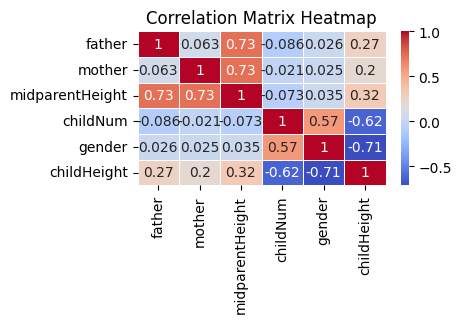

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Cargar y procesar los datos (ejemplo)
df = pd.read_csv('GaltonFamilies.csv')

# Preprocesamiento de datos
df1 = df.copy()
df1 = df1.drop(columns=['rownames', 'children', 'family'])
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})

# Eliminar filas duplicadas si las hubiera
df1 = df1.drop_duplicates()

#Estadísticas
# Calcular estadísticas descriptivas
df_stats = df1.describe(include='all')

# Formatear el DataFrame para mostrar sin decimales las variables numéricas
df_stats_formatted = df_stats.copy()
#numeric_columns = df1.select_dtypes(include=[np.number]).columns
#df_stats_formatted[numeric_columns] = df_stats_formatted[numeric_columns].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)

# Rellenar los valores NaN con cadena vacía en el DataFrame de estadísticas formateadas
df_stats_formatted.fillna('', inplace=True)

print("\033[1;35m")
print("Estadísticas")
print ("\033[0;30m")
print(df_stats_formatted)

df_describe_reset = df1.describe().reset_index()
df_describe_reset_transpuesto = df_describe_reset.transpose()
df_describe_transpuesto = df1.describe().transpose()
df_describe_transpuesto_final = df_describe_transpuesto.copy()

# Calcular el rango, varianza y coeficiente de variación
df_describe_transpuesto_final['range'] = df_describe_transpuesto_final['max'] - df_describe_transpuesto_final['min']
df_describe_transpuesto_final['variance'] = df_describe_transpuesto_final['std'] ** 2
df_describe_transpuesto_final['variation_coef'] = df_describe_transpuesto_final['std'] / df_describe_transpuesto_final['mean']
# Seleccionar solo las columnas numéricas que no son varianza ni coeficiente de variación
numeric_columns_1 = df_describe_transpuesto_final.select_dtypes(include=[np.number]).columns
numeric_columns_to_format = numeric_columns_1.difference(['variance', 'variation_coef'])
# Aplicar el formato solo a las columnas seleccionadas
df_describe_transpuesto_final[numeric_columns_to_format] = df_describe_transpuesto_final[numeric_columns_to_format].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)
# Imprimir el DataFrame formateado
print("\033[1;35m")
print('Estadísticas con rango, varianza y coeficiente de variación')
print ("\033[0;30m")
print(df_describe_transpuesto_final)


# Filtrar las columnas relevantes para el análisis
df1 = df1[['father', 'mother', 'midparentHeight', 'childNum', 'gender','childHeight']]

# Calcular la matriz de correlación
correlation_matrix = df1.corr()

# Imprimir la matriz de correlación
print()
print("\033[1;35m")
print("Matrix de correlación:")
print ("\033[0;30m")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un heatmap
print()
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
print("\033[1;35m")
plt.title('Correlation Matrix Heatmap')
print ("\033[0;30m")
plt.show()



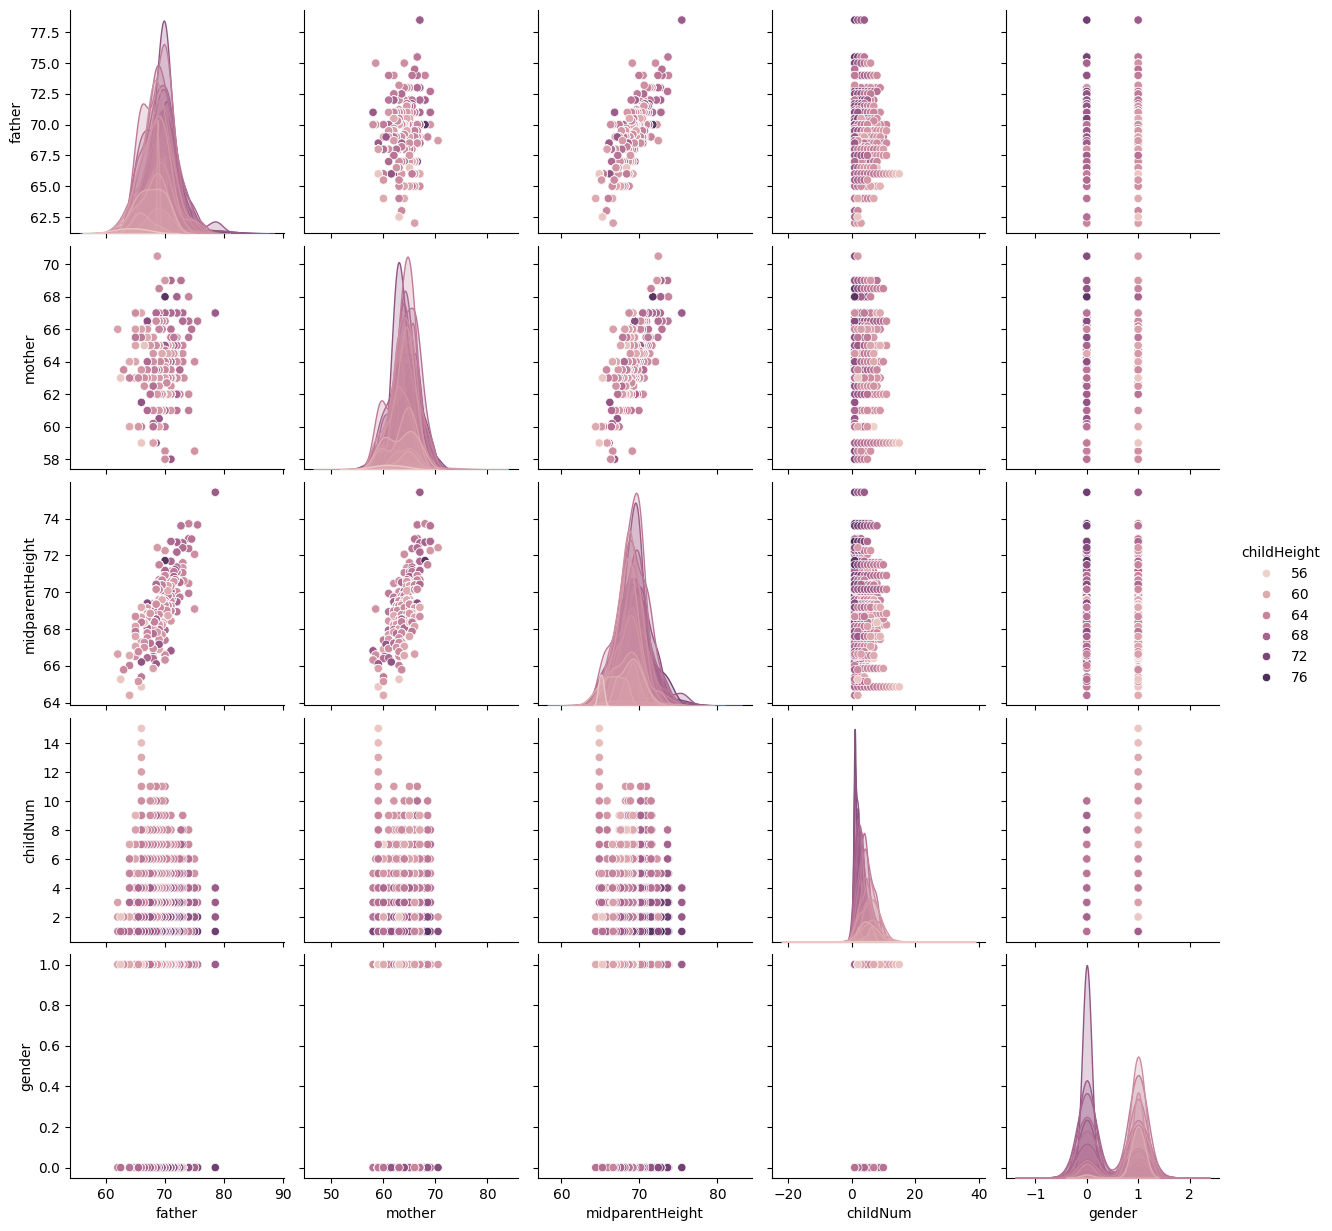

In [6]:
# visualizando los datos
sns.pairplot(df1, kind= "scatter", hue="childHeight")
# en el pairplot se puede apreciar que hay correlaciones.

In [7]:
# Separar las características (variables independientes) y la variable objetivo (dependiente)

#dataset = df1.values
#X = dataset[:, 0:5]
#Y = dataset[:, 5].astype(float)  # Asegurar que Y sea tipo float

X = df1[['father', 'mother', 'childNum', 'gender']]
Y = df1['childHeight']

# Verificar las formas de X y y
print(f"Forma de X: {X.shape}")
print(f"Forma de Y: {Y.shape}")

Forma de X: (911, 4)
Forma de Y: (911,)


In [8]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('modelo = LinearRegression')
print('R^2 Score:', r2)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


modelo = LinearRegression
R^2 Score: 0.6262981228574018
Mean Squared Error (MSE): 4.6003496708964295
Root Mean Squared Error (RMSE): 2.1448425748516904


In [12]:
#Ecuación logaritmica
# Leer el archivo Excel
df4 = df1.copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 933
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   father           911 non-null    float64
 1   mother           911 non-null    float64
 2   midparentHeight  911 non-null    float64
 3   childNum         911 non-null    int64  
 4   gender           911 non-null    int64  
 5   childHeight      911 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 49.8 KB


Tamaño de X: 911
Tamaño de Y: 911
Error Cuadrático Medio (MSE): 0.0015606607152428122
Raíz del Error Cuadrático Medio (RMSE): 0.03950519858503197
Coeficiente de Determinación (R^2): 0.43565283911252983
Coeficiente del modelo (Log del tamaño en metros cuadrados): 0.135156164486921
Intercepto del modelo: 4.1994856538683845


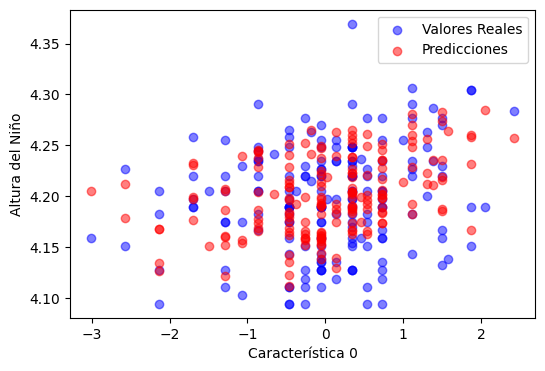

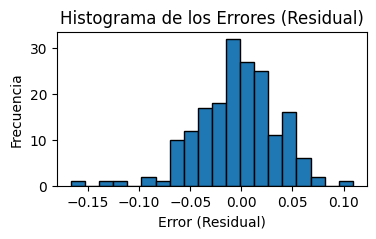

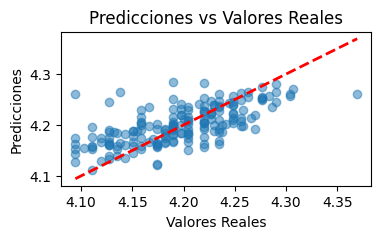

Text(0.5, 1.0, 'histograma de las diferencias')

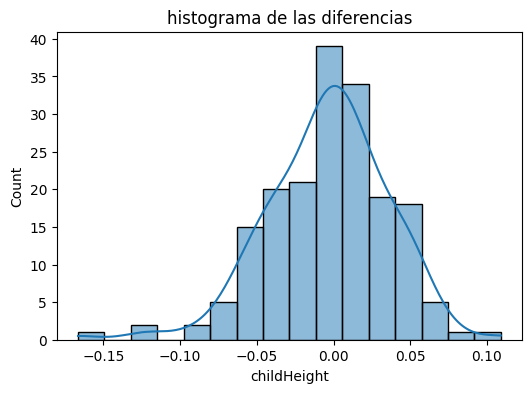

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Ecuación logaritmica
# Leer el archivo Excel
df4 = df1.copy()

# Se omite la columna gender, la cual contiene datos categóricos
# (0' para hombre y '1' para mujer)

# Aplicar la transformación logarítmica
df4['father'] = np.log(df['father'])
df4['mother'] = np.log(df['mother'])
df4['midparentHeight'] = np.log(df['midparentHeight'])
df4['childNum'] = np.log(df['childNum'])
df4['childHeight'] = np.log(df['childHeight'])

# Separar las características (variable independiente) y la variable objetivo (dependiente)
X = df4[['father', 'mother', 'midparentHeight', 'childNum']]
Y = df4['childHeight']

print(f"Tamaño de X: {len(X)}")
print(f"Tamaño de Y: {len(Y)}")

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal (usaremos la transformación logarítmica)
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Verificar los coeficientes
print(f"Coeficiente del modelo (Log del tamaño en metros cuadrados): {modelo.coef_[0]}")
print(f"Intercepto del modelo: {modelo.intercept_}")

# Elegir una columna específica para graficar
feature_index = 0  # Índice de la columna 'father', puedes cambiar esto a 1, 2, o 3 para otras columnas

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(6, 4))
plt.scatter(X_test_scaled[:, feature_index], y_test, color='blue', alpha=0.5, label='Valores Reales')
plt.scatter(X_test_scaled[:, feature_index], y_pred, color='red', alpha=0.5, label='Predicciones')
plt.xlabel(f'Característica {feature_index}')
plt.ylabel('Altura del Niño')
plt.legend()
plt.show()

# Calcular los errores (residuales)
error = y_test - y_pred

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (6,4) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [40]:
pip install tabulate

Tamaño de X: 911
Tamaño de Y: 911


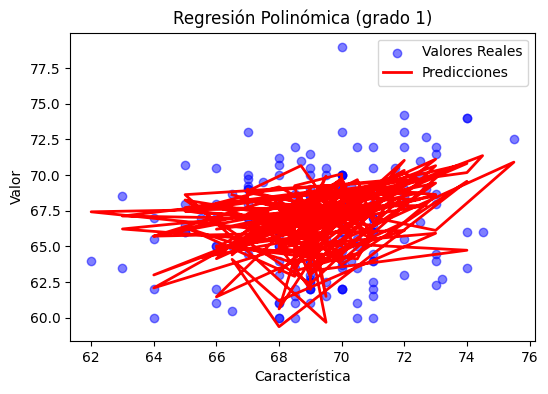

MSE: 7.122763613103088
RMSE: 2.668850616483262
R^2: 0.4213939541380689


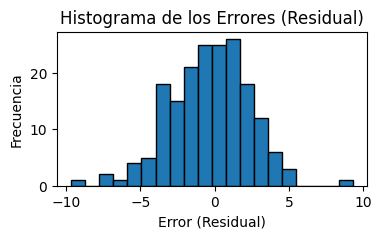

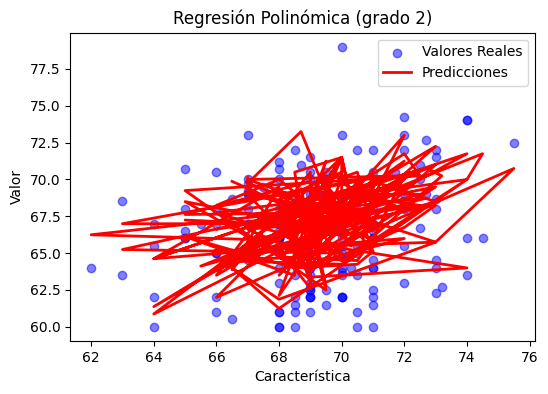

MSE: 7.057271392292301
RMSE: 2.656552538967054
R^2: 0.42671410751903116


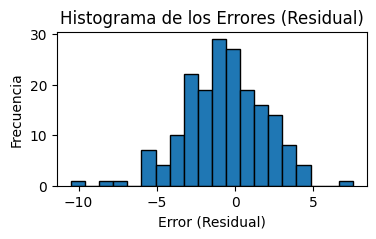

Advertencia: para el grado 3, el valor de R^2 es -0.9739424745195124, lo que indica un problema con el modelo.


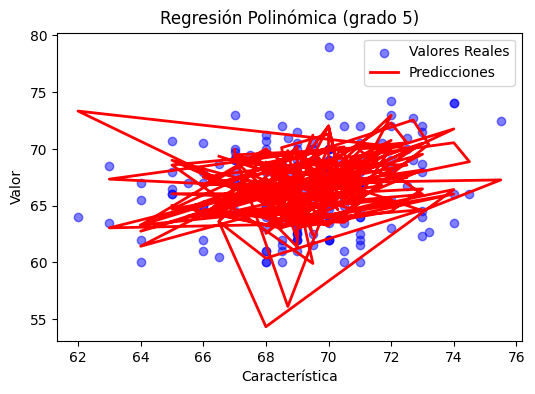

MSE: 8.689449070247518
RMSE: 2.9477871480565754
R^2: 0.2941268248737847


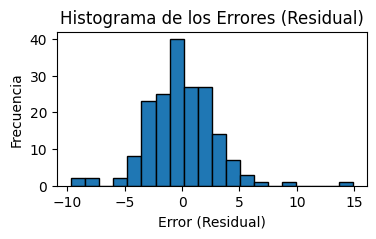

Advertencia: para el grado 10, el valor de R^2 es -1.346896332585302, lo que indica un problema con el modelo.
Advertencia: para el grado 20, el valor de R^2 es -4.281554015942252, lo que indica un problema con el modelo.
Tabla de Resultados:
╒══════════╤═══════╤═══════╤════════╕
│   Degree │   R^2 │   MSE │   RMSE │
╞══════════╪═══════╪═══════╪════════╡
│    1.000 │ 0.421 │ 7.123 │  2.669 │
├──────────┼───────┼───────┼────────┤
│    2.000 │ 0.427 │ 7.057 │  2.657 │
├──────────┼───────┼───────┼────────┤
│    5.000 │ 0.294 │ 8.689 │  2.948 │
╘══════════╧═══════╧═══════╧════════╛


In [42]:
#Regresión polinómica
#creando un objeto para la regresión polinómica con diferentes grados

from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate  # Importar tabulate

df5 = df1.copy()
# Separar las características (variable independiente) y la variable objetivo (dependiente)
X = df5[['father', 'mother', 'midparentHeight','childNum']].values
y = df5['childHeight'].values

print(f"Tamaño de X: {len(X)}")
print(f"Tamaño de Y: {len(y)}")


# Asegurarse de que X y y tienen la misma longitud
if len(X) != len(y):
    raise ValueError(f"X e y deben tener la misma longitud. Longitudes actuales: {len(X)}, {len(y)}")


def polynomial_plot_2(X, y, degree, results_table):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Transformar las características en características polinómicas
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Entrenar el modelo de regresión lineal con características polinómicas
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test_poly)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)

    # Verificar las métricas
    if r2 < 0 or r2 > 1:
        print(f"Advertencia: para el grado {degree}, el valor de R^2 es {r2}, lo que indica un problema con el modelo.")
        return

    # Agregar los resultados a la tabla solo si R^2 es válido
    results_table.append({'Degree': degree, 'R^2': r2, 'MSE': mse, 'RMSE':rmse})

    # Graficar solo si R^2 es válido
    if 0 <= r2 <= 1:
        plt.figure(figsize=(6, 4))

        # Verificar la forma de X_test
        if len(X_test.shape) == 1 or X_test.shape[1] == 1:
            plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Valores Reales')
            plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
        else:
            plt.scatter(X_test[:, 0], y_test, color='blue', alpha=0.5, label='Valores Reales')
            plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2, label='Predicciones')

        plt.xlabel('Característica')
        plt.ylabel('Valor')
        plt.title(f'Regresión Polinómica (grado {degree})')
        plt.legend()
        plt.show()

        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R^2: {r2}")

        # Calcular los errores (residuales)
        error = y_test - y_pred

        # Mostrar el histograma de los errores
        plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
        plt.hist(error, bins=20, edgecolor='black')
        plt.xlabel('Error (Residual)')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de los Errores (Residual)')
        plt.show()

# Crear una tabla para almacenar los resultados
results_table = []

# Llamar a la función con X, y y degree=1
polynomial_plot_2(X, y, 1, results_table)

# Llamar a la función con X, y y degree=2
polynomial_plot_2(X, y, 2, results_table)

# Llamar a la función con X, Y y degree=3
polynomial_plot_2(X, y, 3, results_table)

# Llamar a la función con X, Y y degree=5
polynomial_plot_2(X, y, 5, results_table)

# Llamar a la función con X, Y y degree=10
polynomial_plot_2(X, y, 10, results_table)

# Llamar a la función con X, Y y degree=20
polynomial_plot_2(X, y, 20, results_table)

# Convertir la lista de resultados a un DataFrame
results_df = pd.DataFrame(results_table)

# Mostrar la tabla de resultados con formato de borde
print("Tabla de Resultados:")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".3f"))